In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
# Using working directory, read files with .csv
file_path = glob.glob("*.csv")

In [3]:
# Read csv data into lists
df_list = [pd.read_csv(file) for file in file_path]
# Combine the 4 lists into one panda dataframe
df = pd.concat(df_list, ignore_index=True)
print(df.head())

   Duration           Start date             End date  Start station number  \
0       166  2016-01-01 00:06:58  2016-01-01 00:09:44                 31102   
1       448  2016-01-01 00:10:20  2016-01-01 00:17:48                 32039   
2       715  2016-01-01 00:13:52  2016-01-01 00:25:48                 31222   
3       213  2016-01-01 00:15:29  2016-01-01 00:19:03                 31506   
4       872  2016-01-01 00:16:16  2016-01-01 00:30:49                 31041   

                      Start station  End station number  \
0               11th & Kenyon St NW               31105   
1  Old Georgetown Rd & Southwick St               32002   
2         New York Ave & 15th St NW               31214   
3         1st & Rhode Island Ave NW               31509   
4              Prince St & Union St               31048   

                   End station Bike number Member type  
0         14th & Harvard St NW      W01346      Member  
1  Bethesda Ave & Arlington Rd      W22202      Member  

In [4]:
# Quick built-in data summary
print(df.info())
# Check if there is null/missing value
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333994 entries, 0 to 3333993
Data columns (total 9 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   End date              object
 3   Start station number  int64 
 4   Start station         object
 5   End station number    int64 
 6   End station           object
 7   Bike number           object
 8   Member type           object
dtypes: int64(3), object(6)
memory usage: 228.9+ MB
None
Duration                0
Start date              0
End date                0
Start station number    0
Start station           0
End station number      0
End station             0
Bike number             0
Member type             0
dtype: int64


In [5]:
# Define outliers using Percentile-Based approach
lower_bound = df['Duration'].quantile(0.01)
upper_bound = df['Duration'].quantile(0.99)
outliers = df[(df['Duration'] < lower_bound) | (df['Duration'] > upper_bound)]
print("Outliers in 'Duration' column:")
print(outliers)


Outliers in 'Duration' column:
         Duration           Start date             End date  \
114            70  2016-01-01 01:35:46  2016-01-01 01:36:57   
217         16361  2016-01-01 02:36:10  2016-01-01 07:08:52   
224         30637  2016-01-01 02:47:09  2016-01-01 11:17:47   
225         30626  2016-01-01 02:47:30  2016-01-01 11:17:56   
228         39565  2016-01-01 02:50:29  2016-01-01 13:49:55   
...           ...                  ...                  ...   
3333812       106  2016-12-31 21:09:09  2016-12-31 21:10:55   
3333860       117  2016-12-31 21:46:27  2016-12-31 21:48:25   
3333862        92  2016-12-31 21:48:35  2016-12-31 21:50:07   
3333871        95  2016-12-31 21:54:12  2016-12-31 21:55:48   
3333984        84  2016-12-31 23:43:39  2016-12-31 23:45:04   

         Start station number                   Start station  \
114                     31274                  10th & G St NW   
217                     31120           10th & Florida Ave NW   
224              

In [6]:
# Split date and time into different columns
df["Start date"] = pd.to_datetime(df["Start date"])
df["End date"] = pd.to_datetime(df["End date"])

df["Start Date"] = df["Start date"].dt.date
df["Start Time"] = df["Start date"].dt.time

df["End Date"] = df["End date"].dt.date
df["End Time"] = df["End date"].dt.time

# Make sure the new columns have correct date/time
df.head()

,Duration,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type,Start Date,Start Time,End Date,End Time
0,166,2016-01-01 00:06:58,2016-01-01 00:09:44,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,2016-01-01,00:06:58,2016-01-01,00:09:44
1,448,2016-01-01 00:10:20,2016-01-01 00:17:48,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,2016-01-01,00:10:20,2016-01-01,00:17:48
2,715,2016-01-01 00:13:52,2016-01-01 00:25:48,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,2016-01-01,00:13:52,2016-01-01,00:25:48
3,213,2016-01-01 00:15:29,2016-01-01 00:19:03,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,2016-01-01,00:15:29,2016-01-01,00:19:03
4,872,2016-01-01 00:16:16,2016-01-01 00:30:49,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,2016-01-01,00:16:16,2016-01-01,00:30:49


In [7]:
# Remove the old columns with date and time
df = df.drop(columns = ["Start date", "End date"])
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start Date,Start Time,End Date,End Time
0,166,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,2016-01-01,00:06:58,2016-01-01,00:09:44
1,448,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,2016-01-01,00:10:20,2016-01-01,00:17:48
2,715,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,2016-01-01,00:13:52,2016-01-01,00:25:48
3,213,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,2016-01-01,00:15:29,2016-01-01,00:19:03
4,872,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,2016-01-01,00:16:16,2016-01-01,00:30:49


In [8]:
# Create a dummy variable "Is_Weekend" based on "Start Date", 1 for weekend, and 0 for non-weekend(weekday)
df['Start Date'] = pd.to_datetime(df['Start Date'])
df["Is_Weekend"] = df["Start Date"].dt.dayofweek.apply(lambda x: 1 if x >= 5 else 0)
df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,Start Date,Start Time,End Date,End Time,Is_Weekend
0,166,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,2016-01-01,00:06:58,2016-01-01,00:09:44,0
1,448,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,2016-01-01,00:10:20,2016-01-01,00:17:48,0
2,715,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,2016-01-01,00:13:52,2016-01-01,00:25:48,0
3,213,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,2016-01-01,00:15:29,2016-01-01,00:19:03,0
4,872,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,2016-01-01,00:16:16,2016-01-01,00:30:49,0


In [12]:
# Obtainning historical info from National Centers for Environmental Information 
# Historical weather data requested 1936 - 2024 Washington DC
# Load the weather data
weather_df = pd.read_csv('./weatherdata/HistoricalWeatherData.csv', keep_default_na=True, na_values=[''], low_memory = False)
weather_df.head()





,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,...,WT18,WT18_ATTRIBUTES,WT19,WT19_ATTRIBUTES,WT21,WT21_ATTRIBUTES,WT22,WT22_ATTRIBUTES,WV20,WV20_ATTRIBUTES
0,USW00013743,9/1/1936,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013743,9/2/1936,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013743,9/3/1936,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013743,9/4/1936,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013743,9/5/1936,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Define a function to check if any cell in a column contains the pattern `,,`
def contains_double_comma(column):
    return column.astype(str).str.contains(r',,').any()  # Checks if `,,` is in any cell

# Identify columns with `,,` pattern in any cell
columns_to_drop = [col for col in weather_df.columns if contains_double_comma(weather_df[col])]

# Drop these columns from the DataFrame
weather_df = weather_df.drop(columns=columns_to_drop)

# Append the weather data by date into bike trip df
weather_df['DATE'] = pd.to_datetime(weather_df['DATE'])

#Reduced to 60 columns
weather_df.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,SNOW,SNWD,TMAX,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
0,USW00013743,1936-09-01,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USW00013743,1936-09-02,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USW00013743,1936-09-03,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USW00013743,1936-09-04,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USW00013743,1936-09-05,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
# Only keep weather data for the subject year: 2016
weather_df_2016 = weather_df[weather_df['DATE'].dt.year == 2016]
weather_df_2016.head()

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,SNOW,SNWD,TMAX,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
28976,USW00013743,2016-01-01,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",0.0,0.0,0.0,83.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28977,USW00013743,2016-01-02,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",0.0,0.0,0.0,89.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28978,USW00013743,2016-01-03,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",0.0,0.0,0.0,122.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28979,USW00013743,2016-01-04,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",0.0,0.0,0.0,33.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28980,USW00013743,2016-01-05,38.84721,-77.03454,4.1,"WASHINGTON REAGAN NATIONAL AIRPORT, VA US",0.0,0.0,0.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Keep only date and weather columns
weather_df_2016 = weather_df_2016.drop(columns = ["STATION", "LATITUDE", "LONGITUDE", "ELEVATION", "NAME"])

In [16]:
# Explore remainning columns
weather_df_2016.columns

Index(['DATE', 'PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'ACMH', 'ACSH', 'ADPT',
       'ASLP', 'ASTP', 'AWBT', 'AWND', 'FMTM', 'FRGT', 'PGTM', 'PSUN', 'RHAV',
       'RHMN', 'RHMX', 'TAVG', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM',
       'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM', 'WT01', 'WT02', 'WT03',
       'WT04', 'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT12',
       'WT13', 'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22',
       'WV20'],
      dtype='object')

In [17]:
# Keep only key weather indicators like Preciptation and Temprature, etc.
weather_df_2016 = weather_df_2016.drop(columns = ['SNOW', 'SNWD','ACMH', 'ACSH', 'ADPT',
       'ASLP', 'ASTP', 'AWBT', 'FMTM', 'FRGT', 'PGTM', 'PSUN', 'RHAV',
       'RHMN', 'RHMX', 'TAVG', 'TSUN', 'WDF1', 'WDF2', 'WDF5', 'WDFG', 'WDFM',
       'WESD', 'WSF1', 'WSF2', 'WSF5', 'WSFG', 'WSFM'])
weather_df_2016.head()

,DATE,PRCP,TMAX,TMIN,AWND,WT01,WT02,WT03,WT04,WT05,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV20
28976,2016-01-01,0.0,83.0,22.0,37.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28977,2016-01-02,0.0,89.0,0.0,28.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28978,2016-01-03,0.0,122.0,0.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28979,2016-01-04,0.0,33.0,-60.0,75.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28980,2016-01-05,0.0,11.0,-88.0,46.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
weather_df_2016.columns

Index(['DATE', 'PRCP', 'TMAX', 'TMIN', 'AWND', 'WT01', 'WT02', 'WT03', 'WT04',
       'WT05', 'WT06', 'WT07', 'WT08', 'WT09', 'WT10', 'WT11', 'WT12', 'WT13',
       'WT14', 'WT15', 'WT16', 'WT17', 'WT18', 'WT19', 'WT21', 'WT22', 'WV20'],
      dtype='object')

In [19]:
# Define the dictionary mapping of old to new names, this is to re-name the column titles so they make sense.
# Based on data documentation provided by GHCN (Global Historical Climatology Network)
rename_dict = {
    'PRCP': 'Preciptation', 'TMAX': 'Max_Temp', 'TMIN': 'Min_Temp', 'AWND': 'Avg_Wind_Speed', 'WT01': 'Fog, ice fog',
    'WT02': 'Heavy fog or heaving freezing fog', 'WT03': 'Thunder', 'WT04': 'Ice pellets, sleet, snow pellets',
    'WT05': 'Hail', 'WT06': 'Glaze or rime', 'WT07': 'Dust', 'WT08': 'Smoke', 'WT09': 'Blowing or drifting snow',
    'WT10': 'Tornado, waterspout', 'WT11': 'High or damaging winds', 'WT12': 'Blowing spray', 'WT13': 'Mist',
    'WT14': 'Drizzle', 'WT15': 'Freezing drizzle', 'WT16': 'Rain', 'WT17': 'Freezing rain', 'WT18': 'Snow, snow pellets',
    'WT19': 'Unknown source of precipitation', 'WT21': 'Ground fog', 'WT22': 'Ice fog', 'WV20': 'Rain or snow shower',
    # Add more as needed
}

# Rename columns
weather_df_2016 = weather_df_2016.rename(columns=rename_dict)
weather_df_2016.head()

,DATE,Preciptation,Max_Temp,Min_Temp,Avg_Wind_Speed,"Fog, ice fog",Heavy fog or heaving freezing fog,Thunder,"Ice pellets, sleet, snow pellets",Hail,...,Mist,Drizzle,Freezing drizzle,Rain,Freezing rain,"Snow, snow pellets",Unknown source of precipitation,Ground fog,Ice fog,Rain or snow shower
28976,2016-01-01,0.0,83.0,22.0,37.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28977,2016-01-02,0.0,89.0,0.0,28.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28978,2016-01-03,0.0,122.0,0.0,35.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28979,2016-01-04,0.0,33.0,-60.0,75.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28980,2016-01-05,0.0,11.0,-88.0,46.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
# Append the weather data into original bike sharing trip data based on date
df.rename(columns={'Start Date': 'DATE'}, inplace=True)
merged_df = pd.merge(df, weather_df_2016, on='DATE', how='left')
merged_df.head()

,Duration,Start station number,Start station,End station number,End station,Bike number,Member type,DATE,Start Time,End Date,...,Mist,Drizzle,Freezing drizzle,Rain,Freezing rain,"Snow, snow pellets",Unknown source of precipitation,Ground fog,Ice fog,Rain or snow shower
0,166,31102,11th & Kenyon St NW,31105,14th & Harvard St NW,W01346,Member,2016-01-01,00:06:58,2016-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,448,32039,Old Georgetown Rd & Southwick St,32002,Bethesda Ave & Arlington Rd,W22202,Member,2016-01-01,00:10:20,2016-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,715,31222,New York Ave & 15th St NW,31214,17th & Corcoran St NW,W21427,Member,2016-01-01,00:13:52,2016-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,213,31506,1st & Rhode Island Ave NW,31509,New Jersey Ave & R St NW,W01294,Member,2016-01-01,00:15:29,2016-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,872,31041,Prince St & Union St,31048,King St Metro South,W22058,Member,2016-01-01,00:16:16,2016-01-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Observe new dataframe columns
merged_df.columns

Index(['Duration', 'Start station number', 'Start station',
       'End station number', 'End station', 'Bike number', 'Member type',
       'DATE', 'Start Time', 'End Date', 'End Time', 'Is_Weekend',
       'Preciptation', 'Max_Temp', 'Min_Temp', 'Avg_Wind_Speed',
       'Fog, ice fog', 'Heavy fog or heaving freezing fog', 'Thunder',
       'Ice pellets, sleet, snow pellets', 'Hail', 'Glaze or rime', 'Dust',
       'Smoke', 'Blowing or drifting snow', 'Tornado, waterspout',
       'High or damaging winds', 'Blowing spray', 'Mist', 'Drizzle',
       'Freezing drizzle', 'Rain', 'Freezing rain', 'Snow, snow pellets',
       'Unknown source of precipitation', 'Ground fog', 'Ice fog',
       'Rain or snow shower'],
      dtype='object')

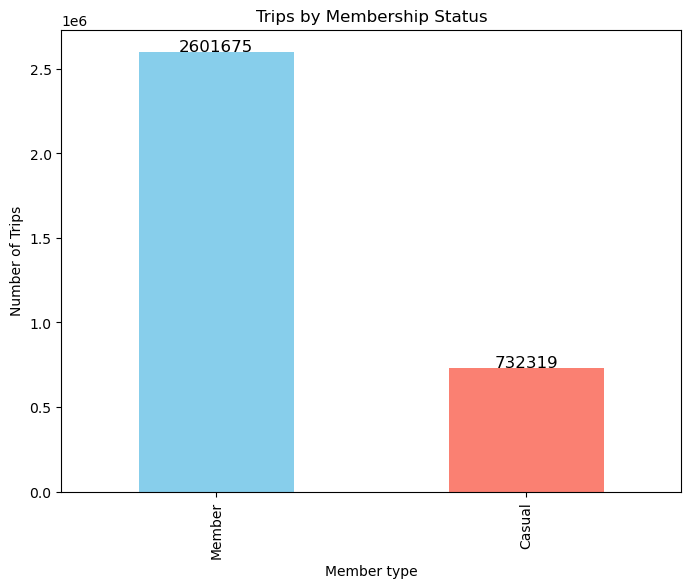

In [22]:
import matplotlib.pyplot as plt

# Count trips for each membership status
trip_counts = merged_df['Member type'].value_counts()

# Plot the histogram
plt.figure(figsize=(8, 6))
trip_counts.plot(kind='bar', color=['skyblue', 'salmon'])

# Add labels and title
plt.xlabel('Member type')
plt.ylabel('Number of Trips')
plt.title('Trips by Membership Status')

# Display actual counts on top of each bar
for index, value in enumerate(trip_counts):
    plt.text(index, value + 500, str(value), ha='center', fontsize=12)  # Adjust the +500 as needed for spacing

# Show plot
plt.show()

In [23]:
from scipy.stats import ttest_ind

# Count the number of trips on weekends and weekdays
weekend_trip_counts = merged_df[merged_df['Is_Weekend'] == 1].shape[0]
weekday_trip_counts = merged_df[merged_df['Is_Weekend'] == 0].shape[0]

# Display the counts
print(f"Weekend trip count: {weekend_trip_counts}")
print(f"Weekday trip count: {weekday_trip_counts}")

# Statistical significance test
# To test, we'll use the trip counts per day to compare weekends and weekdays.
weekend_daily_counts = merged_df[merged_df['Is_Weekend'] == 1].groupby(merged_df['DATE'].dt.date).size()
weekday_daily_counts = merged_df[merged_df['Is_Weekend'] == 0].groupby(merged_df['DATE'].dt.date).size()

# Perform a t-test
t_stat, p_value = ttest_ind(weekend_daily_counts, weekday_daily_counts, equal_var=False)

# Output results
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("The difference in trip counts between weekends and weekdays is statistically significant.")
else:
    print("The difference in trip counts between weekends and weekdays is not statistically significant.")

Weekend trip count: 865848
Weekday trip count: 2468146
T-statistic: -2.7700297440138146, P-value: 0.006231438588352241
The difference in trip counts between weekends and weekdays is statistically significant.


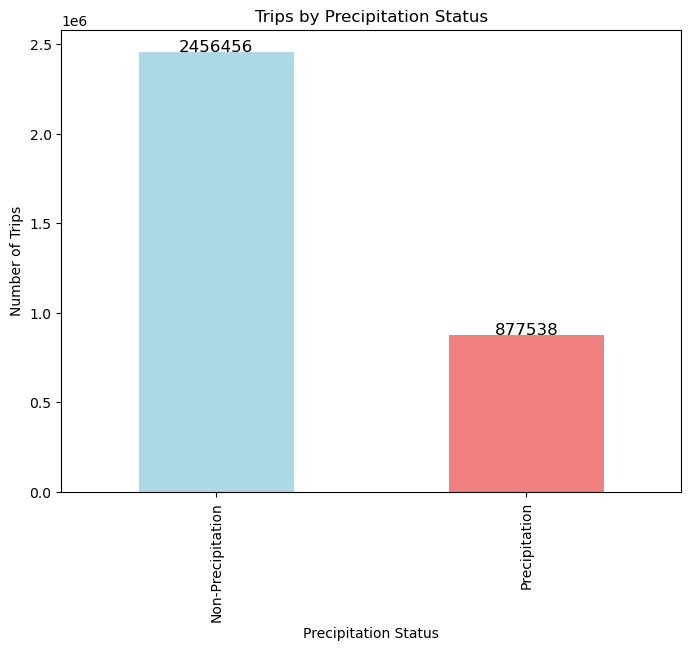

In [24]:
# Count trips done at date with precipitation vs no precipitation 0 or non 0s

# Step 1: Create a new column categorizing trips by precipitation status
merged_df['Precipitation Status'] = merged_df['Preciptation'].apply(lambda x: 'Precipitation' if x != 0 else 'Non-Precipitation')

# Step 2: Count trips by precipitation status
precipitation_counts = merged_df['Precipitation Status'].value_counts()

# Step 3: Plot the counts
plt.figure(figsize=(8, 6))
precipitation_counts.plot(kind='bar', color=['lightblue', 'lightcoral'])

# Add labels and title
plt.xlabel('Precipitation Status')
plt.ylabel('Number of Trips')
plt.title('Trips by Precipitation Status')

# Display count numbers on top of each bar
for index, value in enumerate(precipitation_counts):
    plt.text(index, value + 500, str(value), ha='center', fontsize=12)  # Adjust +500 as needed for spacing

# Show plot
plt.show()